<font size = 40 color=darkgreen>Dutch Rental Prices</font><br>
*Both my friends and myself have often asked the question, 'How much rent could I charge for my apartment?' The question becomes very complex as we start assuming that location, size, amenities, furnished, and many more attributes need to be considered when deciding on a rental price. My goal for this project is to build a model that will weigh all the attributes available using data from a popular rental website in the Netherlands, Kamernet. <BR>  
*Creating a regression model to predict the rental prices in the Netherlands using data from kamernet.nl*<br>
**Steps:**<br>
1. Importing libraries and reading data
2. EDA and re-shaping data for ML pre-processing 
3. PyCaret setup
4. Adjust base data, repeat compare and create steps

# <font color=teal>Import data</font>

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# ML libraries
import pycaret.regression as py
from pycaret.regression import *

# Options for pandas
pd.options.display.max_columns
pd.options.display.max_rows = 30

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import chart_studio.plotly as pl
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [4]:
# Reading json data from Kamernet

#Git
source = 'https://github.com/michael-william/Netherlands-Rental-Prices/raw/master/data/properties-trim.json'
df=pd.read_json(source, lines=True)


# <font color=teal>EDA and reshaping data</font>

> **<font color=brown>Overview</font>**
> 1. Dropping non-needed columns
> 2. Missing values
> 3. Cardinality of categorical values

In [5]:
# Creating copy of main df
data = df[['areaSqm', 'latitude', 'longitude', 'propertyType', 'roommates','rent']]

In [6]:
# converting 'roommates' feature to 'int' and creating a new binary feature called 'shared'
data['roommates'] = data.roommates.replace(to_replace='None', value=0)
data['roommates'] = data.roommates.replace(to_replace='More than 8', value=9)
data['roommates'] = data.roommates.replace(to_replace='Unknown', value=0)
data['roommates'] = data.roommates.replace(to_replace='nan', value=0)
data['roommates'] = data.roommates.fillna(0)
data['roommates'] = data.roommates.astype('int')
data['shared'] = [1 if x>0 else 0 for x in data.roommates]
data['shared'] = ['Yes' if x>0 else 'No' for x in data.roommates]
data.drop('roommates', axis=1, inplace=True)

/Users/michaelcondon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/michaelcondon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/michaelcondon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [11]:
data.head()

,areaSqm,latitude,longitude,propertyType,rent,shared
0,14,51.896601,4.514993,Room,500,Yes
1,30,52.370200,4.920721,Studio,950,No
2,11,52.350880,4.854786,Room,1000,Yes
3,16,53.013494,6.561012,Room,290,Yes
4,22,51.932871,4.479732,Room,475,Yes


In [7]:
#data.to_csv("ml_data.csv")

In [8]:
py.setup(data, target='rent', silent=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1696
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(12830, 6)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(       areaSqm   latitude  longitude  propertyType_Anti-squat  \
 0         14.0  51.896601   4.514993                      0.0   
 1         30.0  52.370200   4.920721                      0.0   
 2         11.0  52.350880   4.854786                      0.0   
 3         16.0  53.013494   6.561012                      0.0   
 4         22.0  51.932871   4.479732                      0.0   
 ...        ...        ...        ...                      ...   
 12825     35.0  52.368030   5.205308                      0.0   
 12826     10.0  51.690365   5.311952                      0.0   
 12827     12.0  52.010965   4.336536                      0.0   
 12828     16.0  52.008520   4.390628                      0.0   
 12829     21.0  51.906095   4.445226                      0.0   
 
        propertyType_Apartment  propertyType_Room  \
 0                         0.0                1.0   
 1                         0.0                0.0   
 2                         0.0                1

In [10]:
py.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,107.571200,40803.454000,200.696200,0.798000,0.304900,0.604000
1,Light Gradient Boosting Machine,117.732400,41395.397200,201.978500,0.796000,0.315100,0.699500
2,CatBoost Regressor,118.682600,43194.418400,206.330400,0.786300,0.318100,0.729600
3,Extra Trees Regressor,108.291200,43754.848300,208.192100,0.782500,0.310200,0.548200
4,Extreme Gradient Boosting,127.212500,47194.183700,215.951100,0.766900,0.328600,0.748700
5,Gradient Boosting Regressor,126.895600,47358.342500,216.378300,0.765800,0.328400,0.748900
6,K Neighbors Regressor,143.817800,60754.311600,245.148700,0.699800,0.351900,0.818100
7,Decision Tree,134.312100,66466.128500,256.503400,0.670700,0.406400,0.578500
8,Linear Regression,171.533500,77435.463900,277.449400,0.613500,0.398800,0.855800
9,Ridge Regression,171.514100,77435.864000,277.450000,0.613500,0.398700,0.855800


In [9]:
rf_new = py.create_model('rf', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,106.3640,49745.4650,223.0369,0.7489,0.3007,0.5126
1,112.7061,39567.7555,198.9165,0.8123,0.3967,1.2270
2,109.0985,34277.1985,185.1410,0.8221,0.2463,0.1868
3,109.3718,43204.5317,207.8570,0.7597,0.2417,0.1810
4,114.6250,47493.1501,217.9292,0.7867,0.3556,0.9680
Mean,110.4331,42857.6201,206.5761,0.7859,0.3082,0.6151
SD,2.9053,5540.7172,13.5619,0.0285,0.0607,0.4198


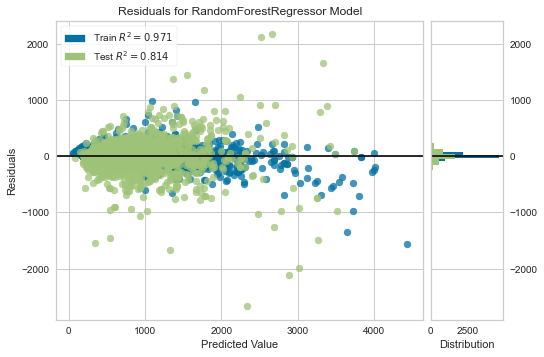

In [35]:
py.plot_model(rf_new)

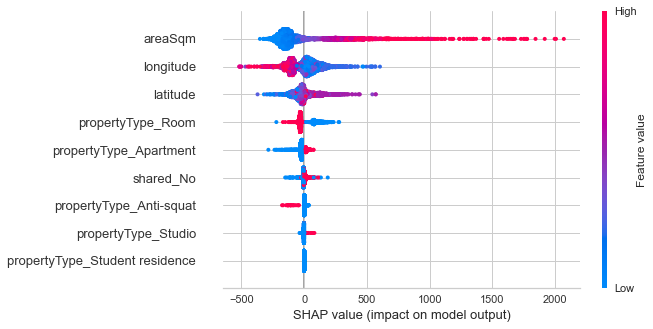

In [36]:
py.interpret_model(rf_new)

In [33]:
rf = finalize_model(rf_new)

In [34]:
py.predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,39.5494,5343.0225,73.096,0.9747,0.2374,0.5363


,areaSqm,latitude,longitude,propertyType_Anti-squat,propertyType_Apartment,propertyType_Room,propertyType_Student residence,propertyType_Studio,shared_No,rent,Label
0,29.0,52.214240,6.860491,0.0,0.0,0.0,0.0,1.0,1.0,695,681.3693
1,56.0,51.896092,4.514936,0.0,1.0,0.0,0.0,0.0,1.0,800,800.4500
2,13.0,50.848663,5.704175,0.0,0.0,1.0,0.0,0.0,0.0,267,288.9600
3,25.0,52.346753,4.980866,0.0,0.0,1.0,0.0,0.0,0.0,610,682.4000
4,7.0,52.319415,4.955577,0.0,0.0,1.0,0.0,0.0,0.0,1200,1053.9729
...,...,...,...,...,...,...,...,...,...,...,...
3845,16.0,52.005796,4.378691,0.0,0.0,1.0,0.0,0.0,0.0,407,434.8283
3846,40.0,51.913609,4.465290,0.0,0.0,1.0,0.0,0.0,0.0,561,558.9336
3847,7.0,51.685764,5.293062,0.0,0.0,1.0,0.0,0.0,0.0,350,364.8800
3848,6.0,51.331989,3.847719,0.0,0.0,1.0,0.0,0.0,0.0,450,397.0800


In [13]:
label_df = predict_model(rf, data=data)

In [14]:
label_df['diff'] = label_df['Label']-label_df['rent']

In [30]:
pd.DataFrame(label_df['diff'].describe())

,diff
count,12830.000000
mean,1.404513
std,75.232266
min,-2222.735000
25%,-18.357500
50%,1.260000
75%,22.620025
max,1055.450000


In [29]:
label_df.sort_values('diff')

,areaSqm,latitude,longitude,propertyType,rent,shared,Label,diff
7829,22,52.001403,4.391896,Room,5999,No,3776.2650,-2222.7350
11551,300,52.438199,6.069780,Apartment,5000,No,3469.7000,-1530.3000
1450,120,52.364031,4.892641,Apartment,5000,No,4034.1833,-965.8167
4889,128,52.384394,4.894921,Apartment,4500,Yes,3564.2390,-935.7610
12636,30,51.890349,4.483604,Studio,2000,No,1128.6857,-871.3143
...,...,...,...,...,...,...,...,...
8515,250,51.735010,5.140037,Apartment,400,No,1121.3500,721.3500
10571,60,52.379664,4.848603,Apartment,300,No,1048.2045,748.2045
8259,352,52.491683,4.744386,Room,500,Yes,1340.0000,840.0000
11415,506,52.696597,6.187860,Apartment,100,No,1063.9700,963.9700


In [100]:
data[['latitude', 'longitude']].describe()

,latitude,longitude
count,12830.000000,12830.000000
mean,52.146481,5.304646
std,0.508045,0.802236
min,50.770041,3.554188
25%,51.918408,4.660486
50%,52.112349,5.083929
75%,52.358147,5.876862
max,53.333967,7.036756


In [126]:
hundredm = 0.00150

In [103]:
origin_long = 4.8798
origin_lat = 52.3887

In [116]:
data['long_from_origin'] = [abs(x-origin_long) for x in data['longitude']]
data['lat_from_origin'] = [abs(x-origin_lat) for x in data['latitude']]

In [130]:
data[(data['long_from_origin']<hundredm) & (data['lat_from_origin']<hundredm) & (data['propertyType'] == 'Apartment')]

,areaSqm,latitude,longitude,propertyType,rent,shared,long_meters,lat_meters,long_from_origin,lat_from_origin
5444,60,52.389722,4.879380,Apartment,900,No,-0.000420,0.001022,0.000420,0.001022
7757,43,52.387494,4.879683,Apartment,1400,No,-0.000117,-0.001206,0.000117,0.001206
11737,75,52.390088,4.878650,Apartment,1800,No,-0.001150,0.001388,0.001150,0.001388


In [ ]:
data.query[abs('latitude')]